Unzipping and adding the data to a pandas dataframe

In [1]:
import numpy as np

In [2]:
import zipfile
import pandas as pd
z = zipfile.ZipFile("../data/vehicles.zip")
z.extractall()

vehicles = pd.read_csv("vehicles.csv")
vehicles_backup = vehicles

Remove un-needed columns

In [ ]:
vehicles = vehicles.drop(['model', 'id','image_url','region_url', 'url', 'condition', 'VIN', 'drive', 'size', 'county', 'description', 'posting_date'], axis=1)


In [ ]:
# see how much data is missing
print(vehicles.isna().sum() / vehicles.shape[0] * 100)
vehicles = vehicles.dropna()

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
type            21.752717
paint_color     30.501078
state            0.000000
lat              1.534155
long             1.534155
dtype: float64


In [ ]:
vehicles.shape

(170194, 14)

In [ ]:
vehicles.sample(10)

,region,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,type,paint_color,state,lat,long
137406,spokane / coeur d'alene,0,2006.0,chevrolet,6 cylinders,gas,126172.0,clean,automatic,coupe,white,id,47.766684,-117.405960
352885,clarksville,31590,2018.0,toyota,6 cylinders,gas,62496.0,clean,other,other,red,tn,35.060000,-85.250000
279856,rochester,11495,2015.0,subaru,4 cylinders,gas,126000.0,clean,automatic,SUV,blue,ny,43.077700,-76.989600
247404,las vegas,7500,2014.0,hyundai,4 cylinders,gas,108000.0,rebuilt,automatic,SUV,grey,nv,36.169300,-115.282800
337669,pittsburgh,31990,2020.0,chevrolet,6 cylinders,other,18321.0,clean,other,pickup,white,pa,40.430000,-79.970000
150584,fort wayne,30000,2015.0,gmc,8 cylinders,gas,135423.0,clean,automatic,truck,white,in,40.833834,-81.338867
415344,appleton-oshkosh-FDL,10950,2006.0,ford,8 cylinders,diesel,142889.0,clean,manual,pickup,silver,wi,44.405015,-88.811252
323505,portland,9990,1989.0,toyota,6 cylinders,gas,174810.0,clean,manual,truck,red,or,45.402100,-122.614400
408413,seattle-tacoma,20995,2008.0,toyota,6 cylinders,gas,96249.0,clean,automatic,SUV,silver,wa,47.768400,-122.127100
77141,denver,30990,2016.0,gmc,6 cylinders,gas,51605.0,clean,other,pickup,silver,co,39.760000,-104.870000


In [ ]:
vehicles['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'mini-van', 'SUV', 'sedan',
       'offroad', 'van', 'convertible', 'hatchback', 'wagon', 'bus'],
      dtype=object)

### Remove any "extreme values" from the dataset
* i.e. any 'free cars' (ones that are listed as free but would say call for price, etc.)
* and just any cars that somehow hit a million miles

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Remove the extremes from the prices
lowerPricePercentile = np.percentile(vehicles['price'], 5)
upperPricePercentile = np.percentile(vehicles['price'], 99)
print(lowerPricePercentile, upperPricePercentile)
vehicles = vehicles[vehicles['price'].between(lowerPricePercentile, upperPricePercentile)]

269.0 61590.0


In [ ]:
# remove extremes from the odometer
lowerOdometerPercentile = np.percentile(vehicles['odometer'], 5)
upperUpperPercentile = np.percentile(vehicles['odometer'], 99)
print(lowerOdometerPercentile, upperUpperPercentile)
vehicles = vehicles[vehicles['odometer'].between(lowerOdometerPercentile, upperUpperPercentile)]

11877.700000000004 274000.0


In [ ]:
vehicles.shape

(150413, 14)

## Plotting what we have now

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>, <Axes: >]], dtype=object)

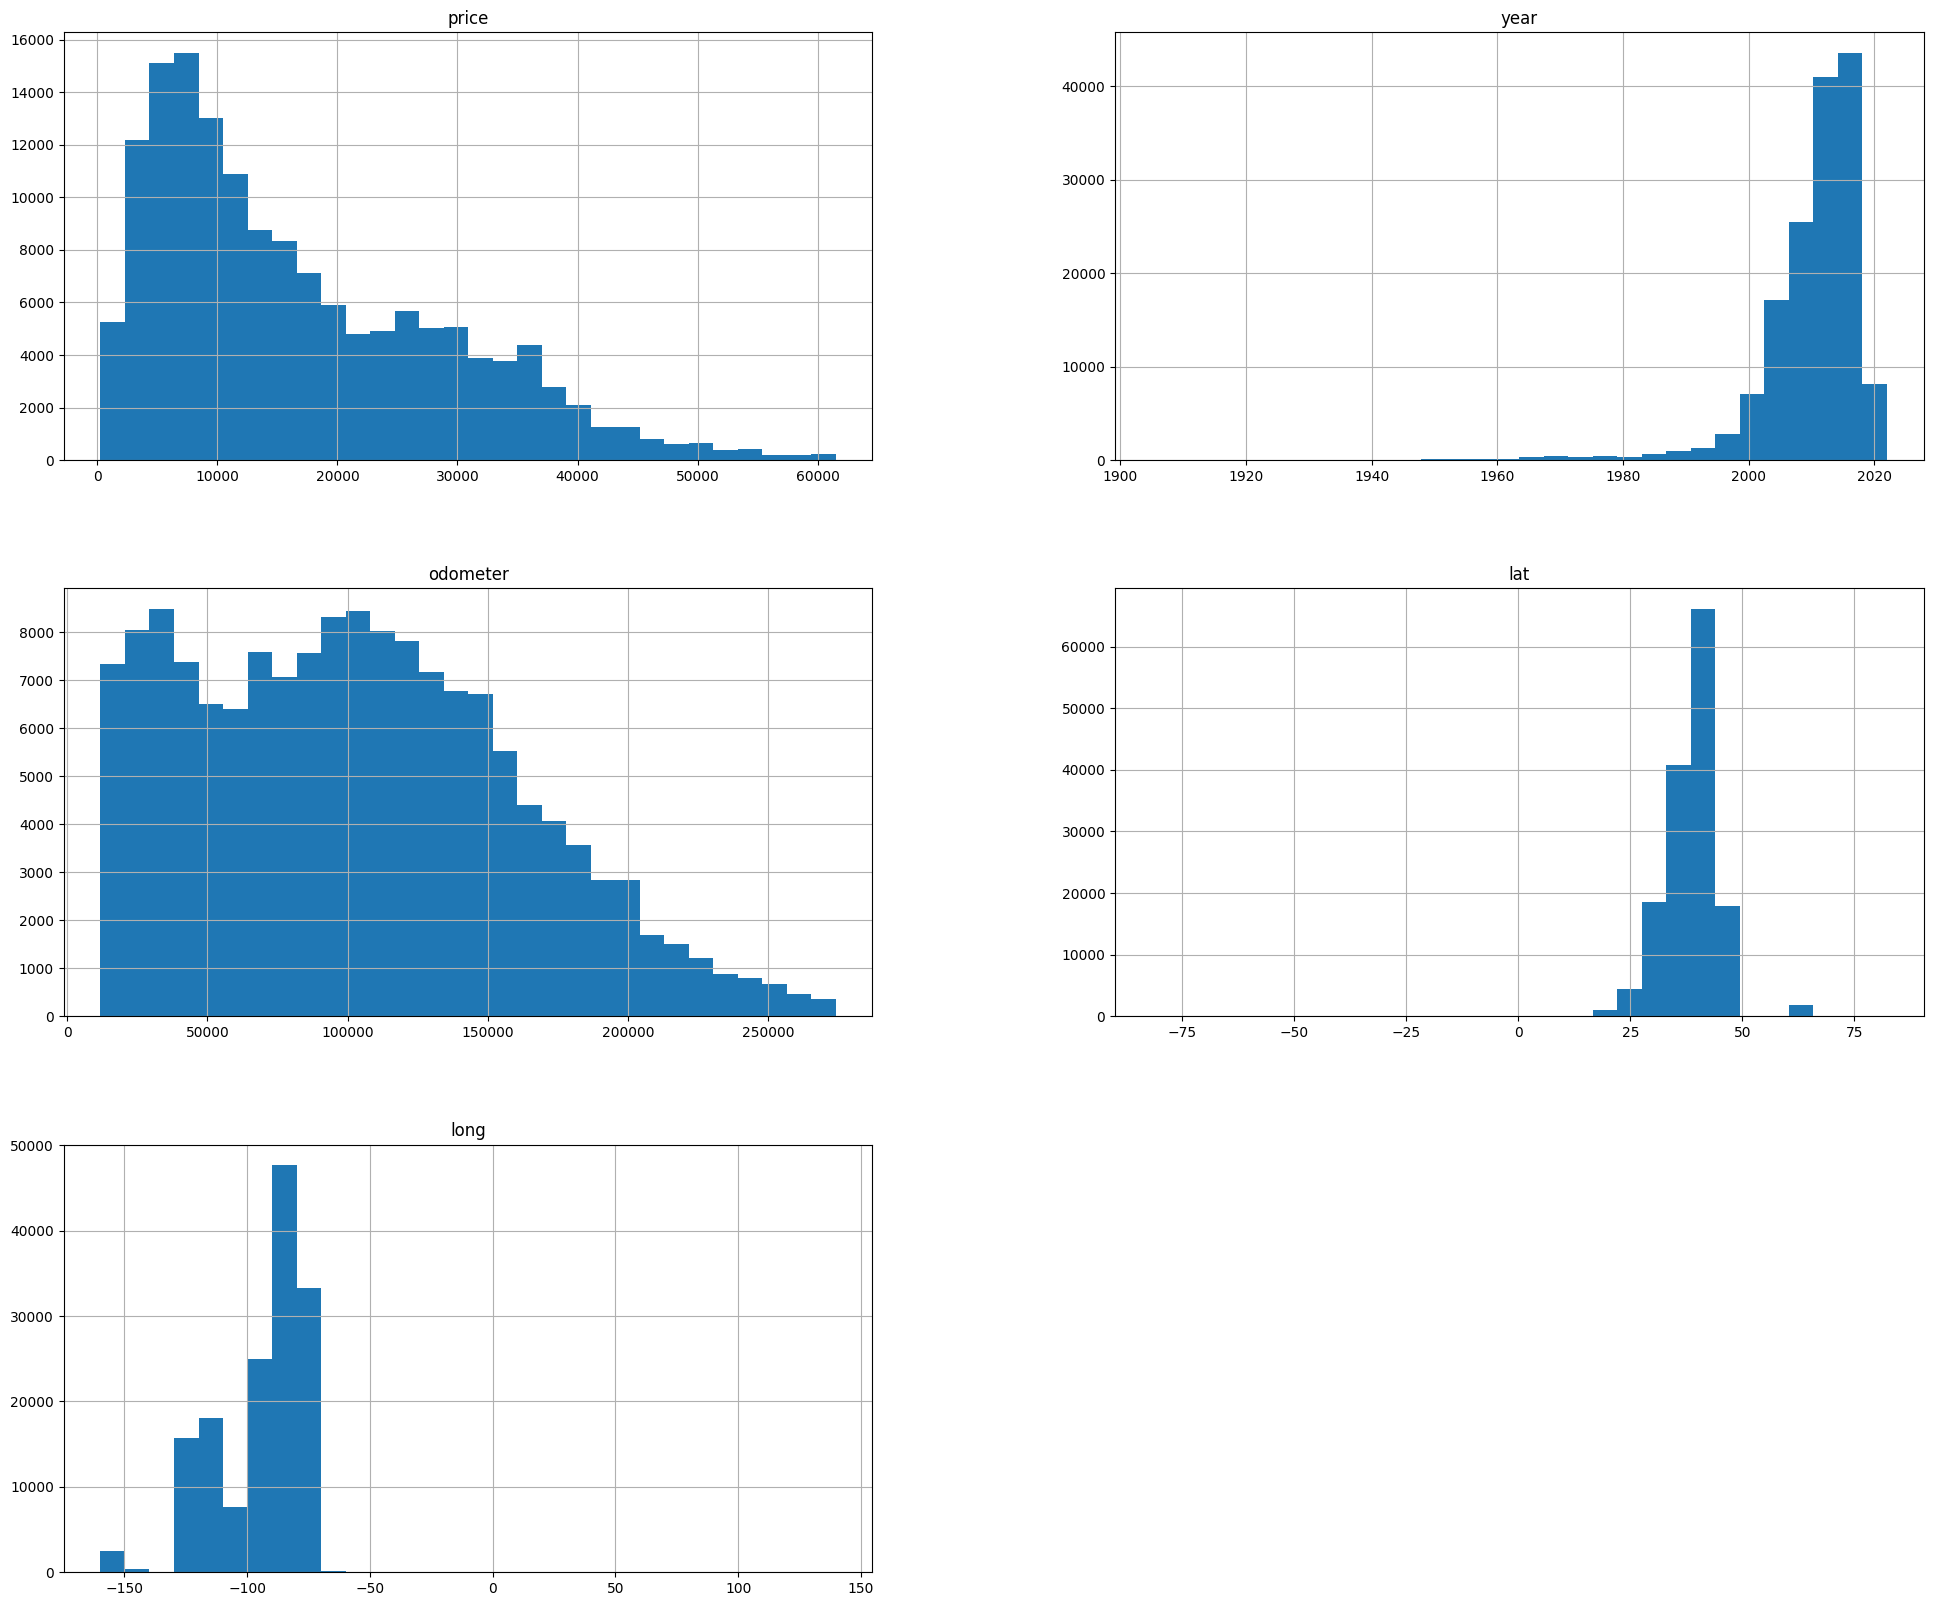

In [ ]:
vehicles.hist(figsize=(24,20), bins=30)

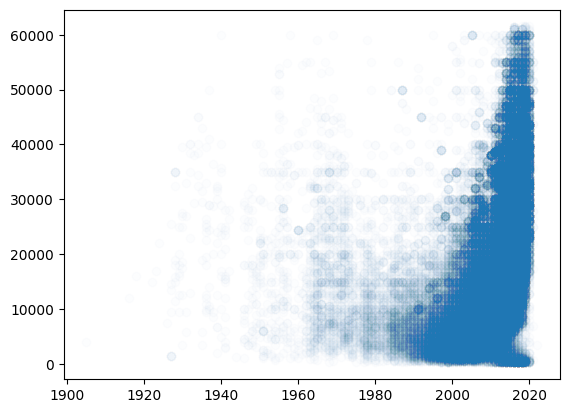

In [ ]:
plt.scatter(vehicles['year'], vehicles['price'], alpha=0.01)

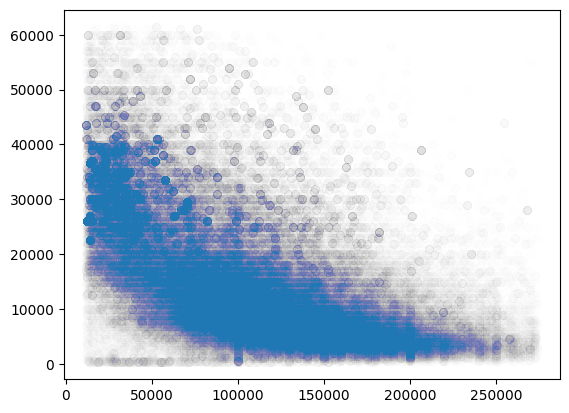

In [ ]:
plt.scatter(vehicles['odometer'], vehicles['price'], alpha=0.005)

### Splitting and Training Data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create the cat and num columns
# Get a list of column names from the 'students' DataFrame that are of numerical data types.
# Get a list of column names from the 'students' DataFrame that are not of numerical data types.

num_cols = vehicles.select_dtypes(include='number').columns.to_list()
cat_cols = vehicles.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove('price')

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations
# todo: don't know if we need the passhtrough
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                   remainder='passthrough'
                                 )

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['year', 'odometer', 'lat', 'long']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['region', 'manufacturer', 'cylinders', 'fuel',
                                  'title_status', 'transmission', 'type',
                                  'paint_color', 'state'])])

In [ ]:
num_cols

['year', 'odometer', 'lat', 'long']

In [ ]:
cat_cols

['region',
 'manufacturer',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'type',
 'paint_color',
 'state']

In [ ]:
vehicles

,region,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,type,paint_color,state,lat,long
27,auburn,33590,2014.0,gmc,8,gas,57923.0,clean,other,pickup,white,al,32.590000,-85.480000
28,auburn,22590,2010.0,chevrolet,8,gas,71229.0,clean,other,pickup,blue,al,32.590000,-85.480000
29,auburn,39590,2020.0,chevrolet,8,gas,19160.0,clean,other,pickup,red,al,32.590000,-85.480000
30,auburn,30990,2017.0,toyota,8,gas,41124.0,clean,other,pickup,red,al,32.590000,-85.480000
31,auburn,15000,2013.0,ford,6,gas,128000.0,clean,automatic,truck,black,al,32.592000,-85.518900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426860,wyoming,39990,2017.0,infiniti,8,gas,41664.0,clean,automatic,other,black,wy,33.779214,-84.411811
426864,wyoming,29590,2016.0,toyota,6,gas,53475.0,clean,automatic,SUV,black,wy,33.786500,-84.445400
426866,wyoming,32990,2016.0,infiniti,8,gas,55612.0,clean,automatic,other,black,wy,33.779214,-84.411811
426874,wyoming,33590,2018.0,lexus,6,gas,30814.0,clean,automatic,sedan,white,wy,33.779214,-84.411811


In [ ]:
# Apply the preprocessing pipeline on the dataset
vehicles_prepared = preprocessing.fit_transform(vehicles)


In [ ]:

# # Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
#vehicles_prepared.shape
vehicles_prepared = pd.DataFrame(data=vehicles_prepared, columns=feature_names)
vehicles_prepared.shape

(150413, 548)

In [ ]:
vehicles_prepared.columns

Index(['num__year', 'num__odometer', 'num__lat', 'num__long',
       'cat__region_SF bay area', 'cat__region_abilene',
       'cat__region_akron / canton', 'cat__region_albany',
       'cat__region_albuquerque', 'cat__region_altoona-johnstown',
       ...
       'cat__state_tn', 'cat__state_tx', 'cat__state_ut', 'cat__state_va',
       'cat__state_vt', 'cat__state_wa', 'cat__state_wi', 'cat__state_wv',
       'cat__state_wy', 'remainder__price'],
      dtype='object', length=548)

In [ ]:
# ALIS EDITS below

In [ ]:
vehicles_prepared.head()

,num__year,num__odometer,num__lat,num__long,cat__region_SF bay area,cat__region_abilene,cat__region_akron / canton,cat__region_albany,cat__region_albuquerque,cat__region_altoona-johnstown,...,cat__state_tn,cat__state_tx,cat__state_ut,cat__state_va,cat__state_vt,cat__state_wa,cat__state_wi,cat__state_wv,cat__state_wy,remainder__price
0,0.420691,-0.786414,-1.009883,0.464174,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33590.0
1,-0.059729,-0.554605,-1.009883,0.464174,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22590.0
2,1.141322,-1.461722,-1.009883,0.464174,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39590.0
3,0.781007,-1.079077,-1.009883,0.464174,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30990.0
4,0.300586,0.434428,-1.009543,0.462038,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.0


## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Quick Test to see if dropping models makes it more accurate?
# RME = 1.2051119375586298e+29

In [46]:
X = vehicles_prepared.drop(["remainder__price"], axis=1)
y = vehicles_prepared['remainder__price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120330, 547) (120330,) (30083, 547) (30083,)


# Linear Regression 

In [53]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train.iloc[:10000],y_train.iloc[:10000])
# # lr_model.fit(X_train,y_train)


LinearRegression()

In [54]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

Linear Regression - Mean Squared Error: 5.0530130106360195e+25
Linear Regression - R-squared: -3.3982121687060666e+17


# Random Forest Regression

In [55]:

from sklearn.ensemble import RandomForestRegressor

#Initalization
forest_model = RandomForestRegressor()

#Training
forest_model.fit(X_train.iloc[:20000],y_train.iloc[:20000])

RandomForestRegressor()

In [56]:
# Predict prices using the trained Random Forest model
predicted_prices_forest = forest_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the Random Forest model
mse_forest = mean_squared_error(y_test, predicted_prices_forest)

# Calculate R-squared for the Random Forest model
r2_forest = r2_score(y_test, predicted_prices_forest)

print(f"Random Forest - Mean Squared Error: {mse_forest}")
print(f"Random Forest - R-squared: {r2_forest}")


Random Forest - Mean Squared Error: 21319911.6421002
Random Forest - R-squared: 0.8566210238813459


# Gradient Boosting Regression

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

#Initalization
gradient_boosting_model = GradientBoostingRegressor()

#Training 
gradient_boosting_model.fit(X_train.iloc[:20000],y_train.iloc[:20000])

GradientBoostingRegressor()

In [66]:
# Predict prices using the trained Gradient Boosting model
predicted_prices_gradient_boosting = gradient_boosting_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the Gradient Boosting model
mse_gradient_boosting = mean_squared_error(y_test, predicted_prices_gradient_boosting)

# Calculate R-squared for the Gradient Boosting model
r2_gradient_boosting = r2_score(y_test, predicted_prices_gradient_boosting)

print(f"Gradient Boosting - Mean Squared Error: {mse_gradient_boosting}")
print(f"Gradient Boosting - R-squared: {r2_gradient_boosting}")

Gradient Boosting - Mean Squared Error: 29761631.923439518
Gradient Boosting - R-squared: 0.7998494372567365


# Stacking Regression

In [68]:
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor())
]

# Initialize the Stacking Regressor
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()  # Meta-estimator to combine the base models' predictions
)

# Train the Stacked model on the training data
stacked_model.fit(X_train.iloc[:20000], y_train.iloc[:20000])


In [ ]:
# Predict prices using the trained Stacked model
predicted_prices_stacked = stacked_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the Stacked model
mse_stacked = mean_squared_error(y_test, predicted_prices_stacked)

# Calculate R-squared for the Stacked model
r2_stacked = r2_score(y_test, predicted_prices_stacked)

print(f"Stacked Model - Mean Squared Error: {mse_stacked}")
print(f"Stacked Model - R-squared: {r2_stacked}")

# Plot Scatter for Linear Regression

Text(0.5, 1.0, 'Actual vs. Predicted')

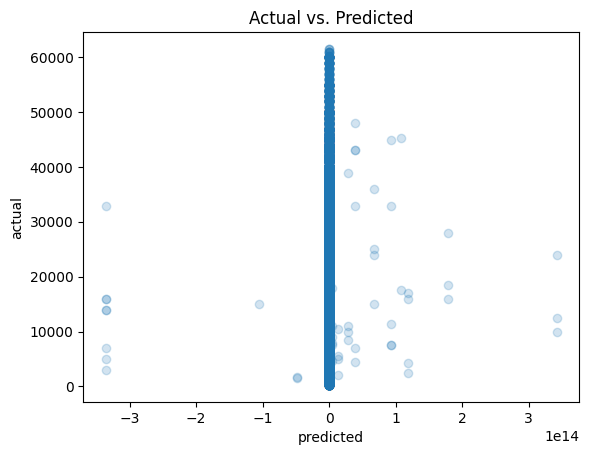

In [37]:
plt.scatter(lr_y_predict, y_test, alpha=0.2)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("Actual vs. Predicted")

SVM

In [29]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report
# from sklearn.metrics import ConfusionMatrixDisplay

In [30]:
# model_svm = SVC(kernel='poly', C=0.1, gamma=1)
# model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

In [ ]:
# testing model
# y_predict = model_svm.predict(X_test)
# print(classification_report(y_test,y_predict))

In [ ]:
# this basicalyl doesn't run, 
#ConfusionMatrixDisplay.from_predictions(y_test, y_predict)